# Fraud Classification

## Data Exploration

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload 'kaggle.json'

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arpitshourya","key":"b97d69dce2d42cb495ab308072170955"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/creditcardfraud.zip -d Data/

Archive:  /content/creditcardfraud.zip
replace Data/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
df=pd.read_csv("/content/Data/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# distribution of legit and fraud transaction
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Unbalaced dataset

0=Normal Transaction
1=Fraud Transaction

In [ ]:
legit=df[df.Class==0]
fraud=df[df.Class==1]


In [ ]:
len(legit)

284315

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
# Comparevalues for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Visualizaton

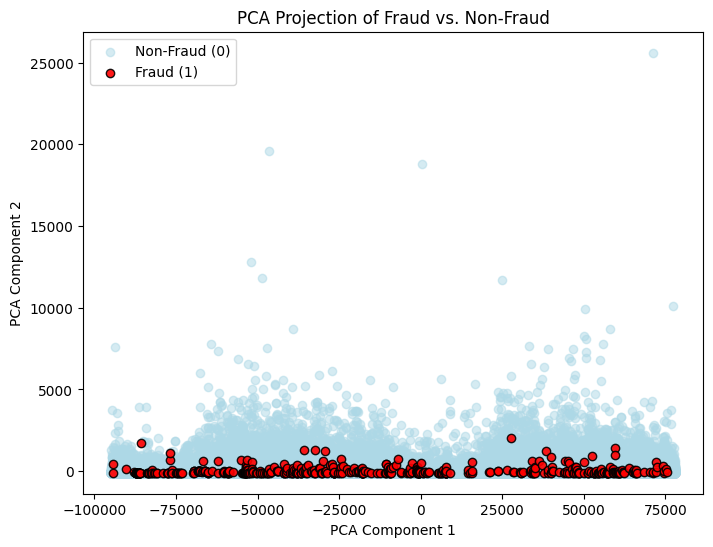

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Example dataset: Replace this with your real dataset
X = df.drop('Class',axis=1)  # 5 features
y = df['Class']  # Binary labels
# Reduce dimensions to 2D using PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot for both classes
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='lightblue', alpha=0.5, label="Non-Fraud (0)")
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='red', edgecolors='k', alpha=0.9, label="Fraud (1)")

# Labels and legend
plt.title("PCA Projection of Fraud vs. Non-Fraud")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


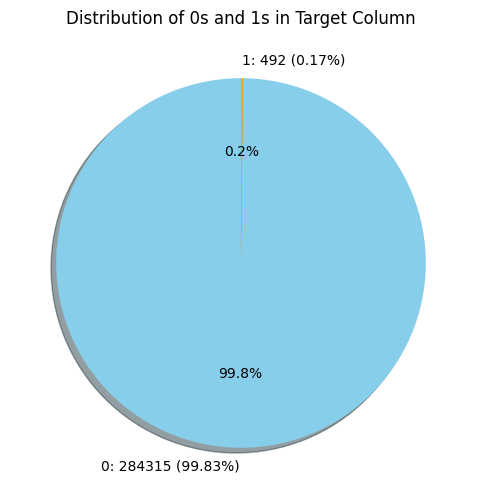

In [ ]:
# Count the occurrences of 0s and 1s
counts = df['Class'].value_counts()
labels = counts.index  # 0 and 1
sizes = counts.values  # Count of each category
percentages = [(count / sum(sizes)) * 100 for count in sizes]  # Calculate percentages

# Create labels with percentages
labels_with_percent = [f'{label}: {size} ({percentage:.2f}%)' for label, size, percentage in zip(labels, sizes, percentages)]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels_with_percent, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, shadow=True)
plt.title('Distribution of 0s and 1s in Target Column')
plt.show()


## Feature engineering & selection

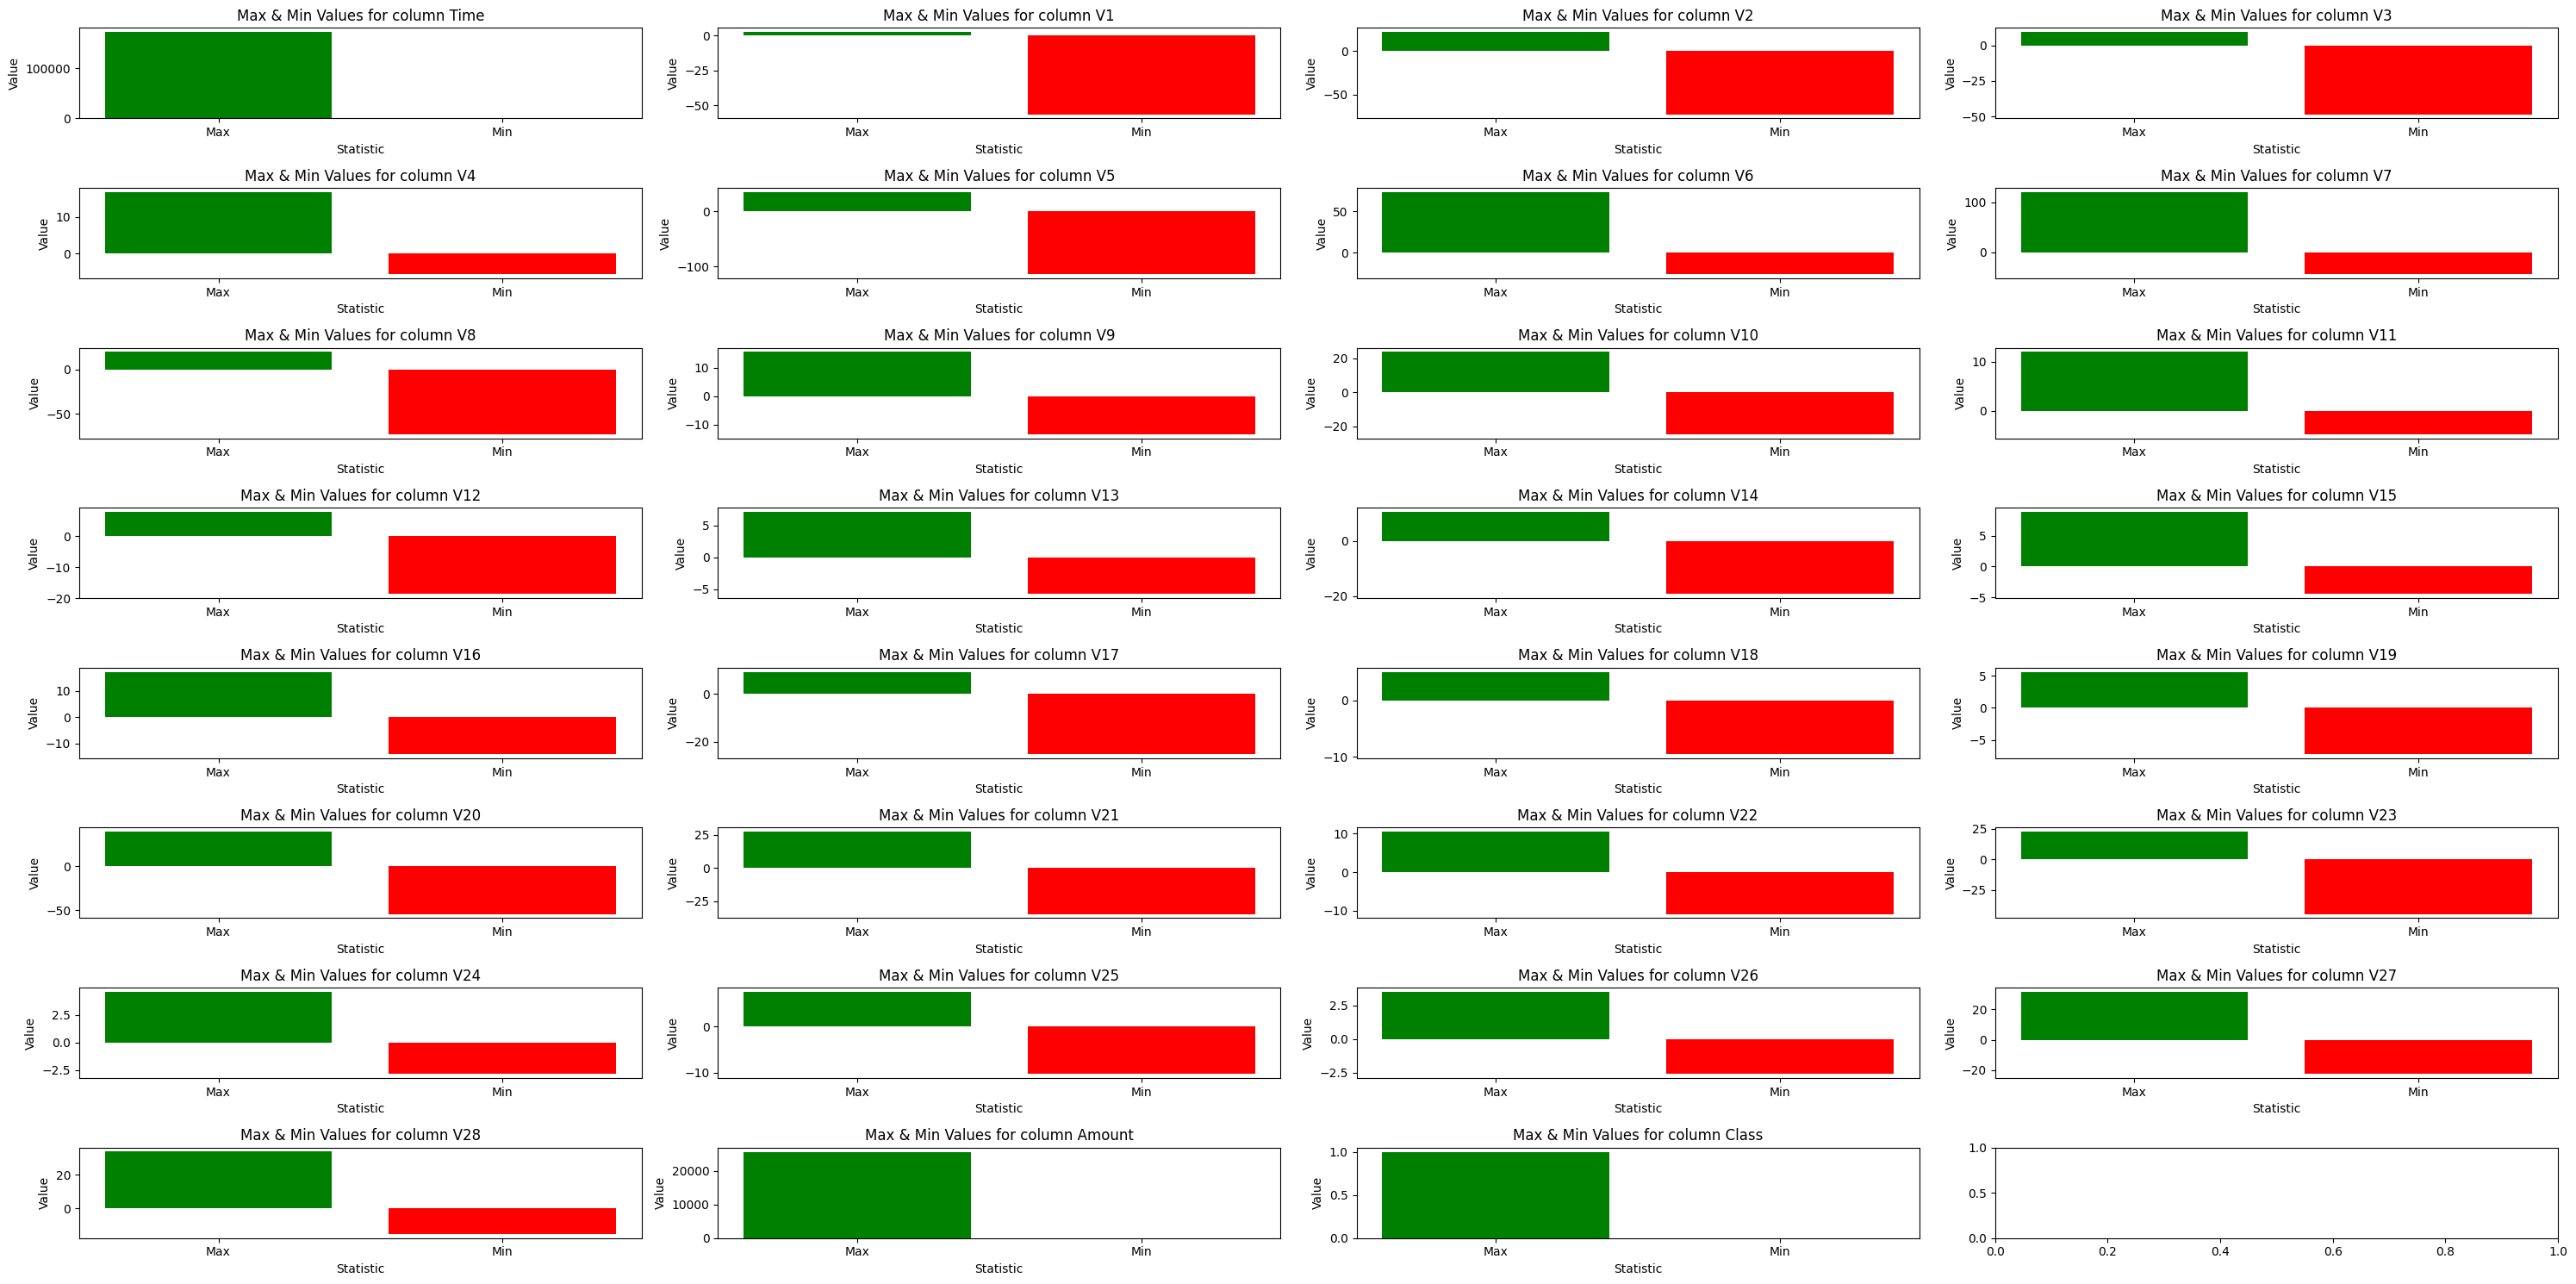

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(30, 15))  # 10 row, 3 columns
axes=axes.flatten()
for i,j in enumerate(df.columns):
  max_value = df[j].max()
  min_value = df[j].min()

  axes[i].bar(['Max', 'Min'], [max_value, min_value], color=['green', 'red'])
  axes[i].set_xlabel("Statistic")
  axes[i].set_ylabel("Value")
  axes[i].set_title(f"Max & Min Values for column {j}")
plt.tight_layout()
plt.show()

We can conclude from the graphs that column "Time" and "Amount" has very wide range. Hence we need to do normalization of both features.

In [ ]:
df['Time'].tail()

,Time
284802,172786.0
284803,172787.0
284804,172788.0
284805,172788.0
284806,172792.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Time']=scaler.fit_transform(df[['Time']])
df['Amount']=scaler.fit_transform(df[['Amount']])

In [ ]:
df['Time'].max()

1.6420577336572635

In [ ]:
df['Amount'].max()

102.36224270928423

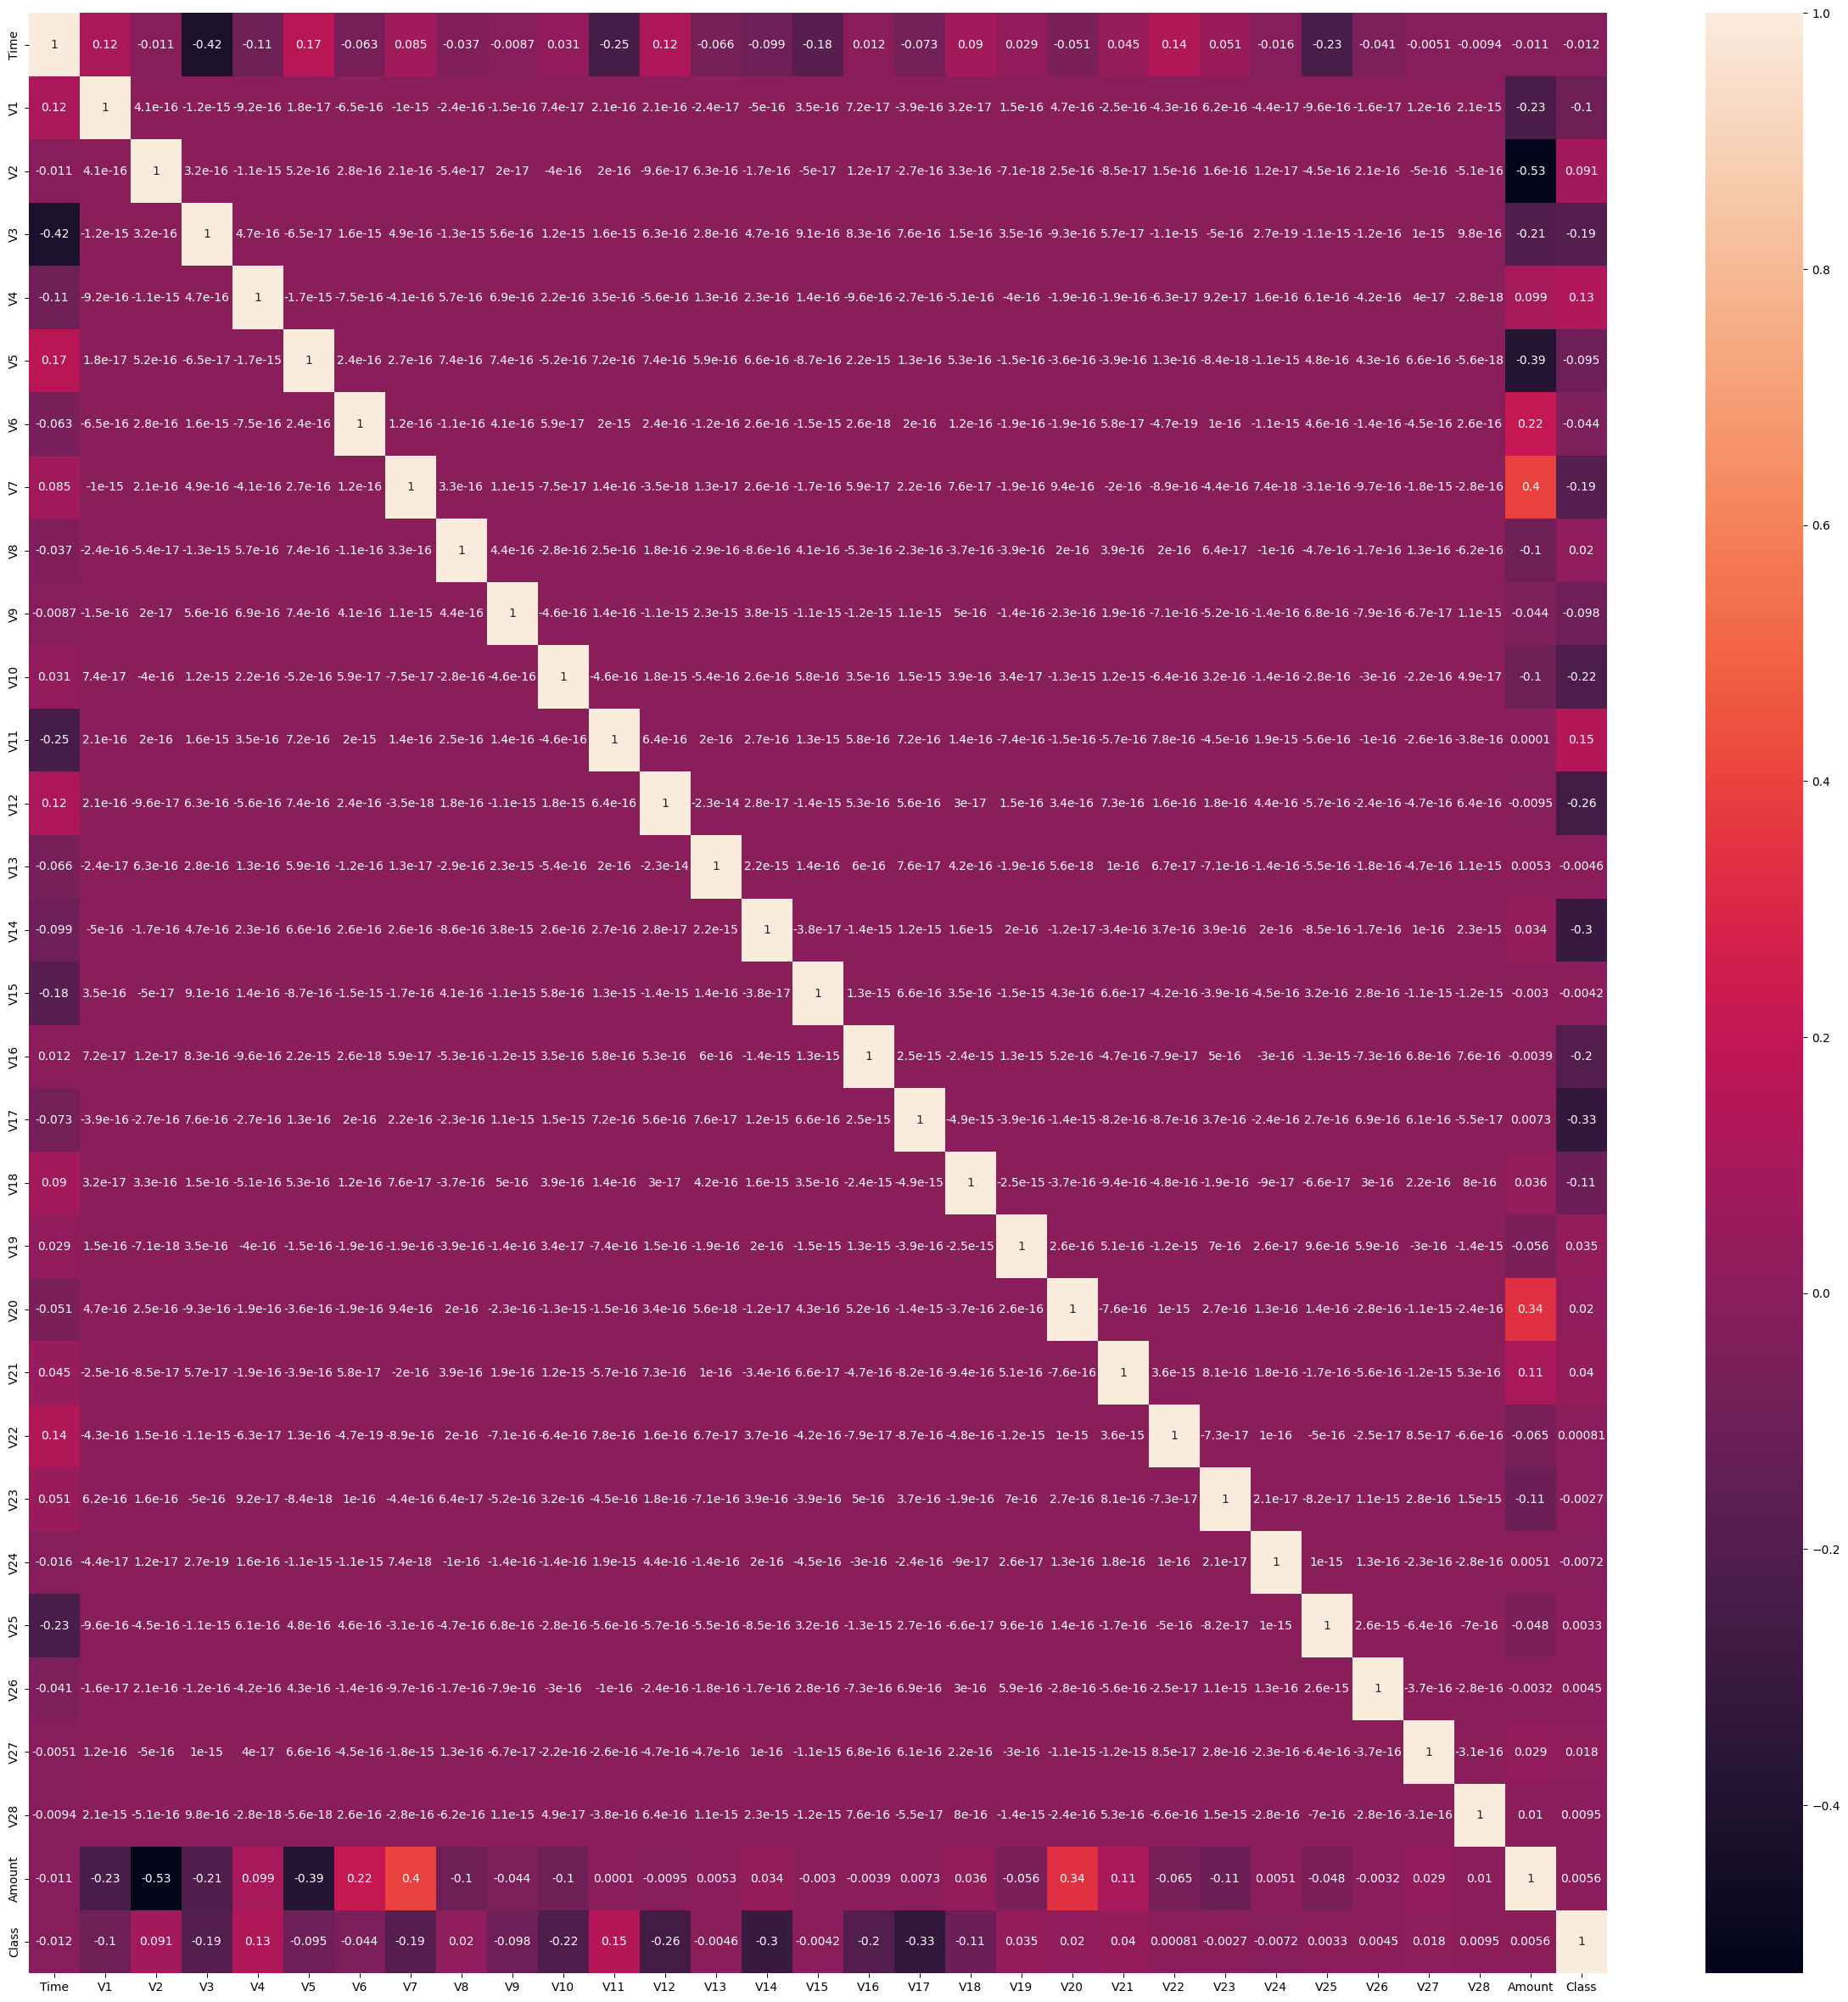

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30, 30))  # Set the figure size
sns.heatmap(df.corr(),annot=True)
plt.show()

There's no high correlation b/w two features


In [ ]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
print(len(X_train[y_train==0]))
print(len(X_train[y_train==1]))
print(len(X_test[y_test==0]))
print(len(X_test[y_test==1]))

227451
394
56864
98


## Ways to handle imbalanced data

1.   UnderSampling
2.   Oversampling
3.   Combination of both
4.   Cost Sensetive Learning





In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Define the pipeline
smote = SMOTE(sampling_strategy=0.2)  # Make fraud cases 20% of non-fraud
undersample = RandomUnderSampler(sampling_strategy=0.5)  # Make normal cases 2x fraud

pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersample)
])

# Apply resampling
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check new class distribution
print(Counter(y_resampled))


Counter({0: 113726, 1: 56863})


In [ ]:
df_resampled=pd.concat([X_resampled,y_resampled])

In [ ]:
df_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57543,-0.986771,0.206956,-1.718684,0.473790,1.423419,-1.327771,0.121525,0.173926,0.015798,0.930673,...,0.194206,-0.169729,-0.415201,0.480876,0.233378,0.381941,-0.072113,0.097251,1.584363,NaN
29288,-1.251196,1.372743,-0.746721,-1.374151,-1.821639,1.603347,3.040105,-0.758336,0.697218,-1.156496,...,-0.305757,-1.315116,0.128255,0.956280,0.338917,-0.633517,-0.015455,0.022180,-0.093754,NaN
126719,-0.352633,1.224526,0.277576,0.630768,1.108677,-0.528905,-0.854877,-0.018601,-0.092442,0.228622,...,-0.289868,-0.888668,0.159434,0.308279,0.259007,-0.690026,0.024449,0.030693,-0.345233,NaN
70442,-0.862235,1.168885,-0.159847,0.347363,0.148326,-0.722975,-1.091998,0.016003,-0.213016,0.251758,...,-0.094788,-0.424804,0.014367,0.429750,0.174012,0.897800,-0.093875,0.015715,-0.093514,NaN
121895,-0.388642,-3.512625,0.237999,-1.303383,0.177490,-1.053300,-0.846182,-0.049904,1.455840,-0.527522,...,0.201234,0.315133,0.268957,0.165524,-0.350274,0.290735,-0.288874,-0.497994,-0.116823,NaN


In [ ]:
df_resampled['Class'].value_counts()

,count
Class,
0.0,113726
1.0,56863


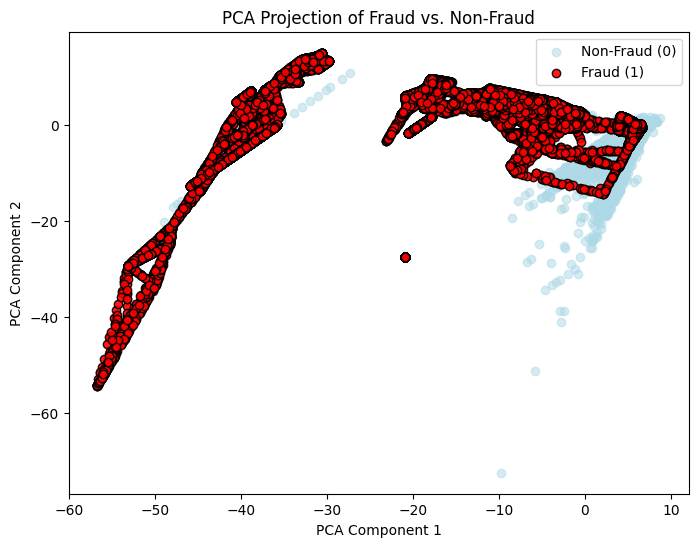

In [ ]:
pca = PCA(n_components=2)
X_resampled_pca = pca.fit_transform(X_resampled)

# Scatter plot for both classes
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_pca[y_resampled == 0, 0], X_resampled_pca[y_resampled == 0, 1], color='lightblue', alpha=0.5, label="Non-Fraud (0)")
plt.scatter(X_resampled_pca[y_resampled == 1, 0], X_resampled_pca[y_resampled == 1, 1], color='red', edgecolors='k', alpha=0.9, label="Fraud (1)")

# Labels and legend
plt.title("PCA Projection of Fraud vs. Non-Fraud")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


From the above graph, it's evident that trying to balance the dataset isn't worth it because it's creating lot of unnatural fraud cases which is far from the real world. Our model would be at the risk of being unrealistic.

Hence it is better if we treat the problen as anamoly detection problem rather than a classification one. However anamoly detection algorithms works without labels and detects unseen fraud and supervised classification algorithms gives high accuracy and handles imbalanced data. Hence we will use combination of both.

## Model Training

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Handle class imbalance using scale_pos_weight
fraud_ratio = sum(y_train == 0) / sum(y_train == 1)  # Majority / Minority ratio

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, scale_pos_weight=fraud_ratio, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC-ROC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

[[56844    20]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost AUC-ROC Score: 0.976873930495102


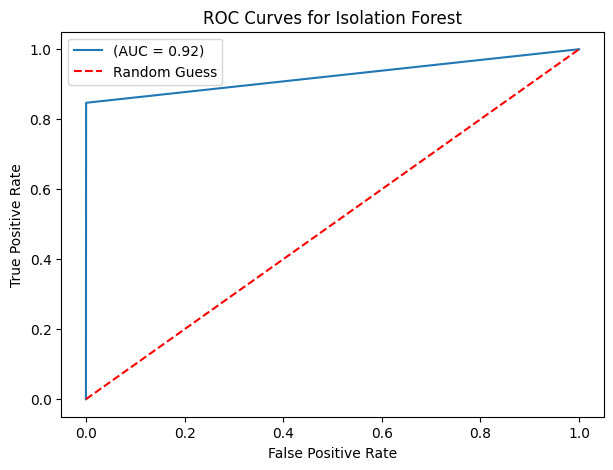

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 5))
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Isolation Forest')
plt.legend()
plt.show()

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest (Only on Non-Fraud cases)
X_train_nonfraud = X_train[y_train == 0]

iso_forest = IsolationForest(n_estimators=100, contamination=0.002, random_state=42)
iso_forest.fit(X_train_nonfraud)  # Train only on normal data

# Predict anomalies in test set
y_pred_iso = iso_forest.predict(X_test)

# Convert output (-1 = Fraud, 1 = Normal)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Model Evaluation
print("Isolation Forest AUC-ROC Score:", roc_auc_score(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso))


Isolation Forest AUC-ROC Score: 0.6723790669897672
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.22      0.35      0.27        98

    accuracy                           1.00     56962
   macro avg       0.61      0.67      0.63     56962
weighted avg       1.00      1.00      1.00     56962



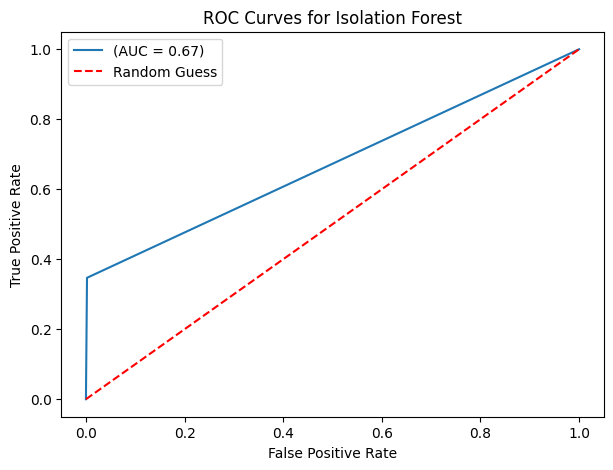

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 5))
fpr, tpr, _ = roc_curve(y_test, y_pred_iso)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Isolation Forest')
plt.legend()
plt.show()

### Combine XGBoost & Isolation Forest Predictionn


In [ ]:
import numpy as np

y_pred_xgb = np.array(y_pred_xgb)
y_pred_iso = np.array(y_pred_iso)

# Weighted ensemble (50% XGBoost + 50% Isolation Forest)
final_pred = np.where((y_pred_xgb + y_pred_iso) > 0, 1, 0)

# Evaluate Final Model
print("Final Ensemble AUC-ROC Score:", roc_auc_score(y_test, final_pred))
print(classification_report(y_test, final_pred))


Final Ensemble AUC-ROC Score: 0.9273316283463301
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.86      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.93      0.76     56962
weighted avg       1.00      1.00      1.00     56962

